In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
df2=pd.read_csv("ParisHousing.csv")
df2.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [3]:
train.head()

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
3   3         97184             99        0        0      59     15113   
4   4         61752            100        0        0      57     64245   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3  3436795.2  
1       729   4496     277               0             6  9519958.0  
2      7473   8953     245               1             9  9276448.1  
3      6424   8522     256               1             9  9725732.2  
4      7151   2786     863               0             7  6181908.8

In [4]:
test.tail()

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
15149  37879         86184             74        1        1      73     14009   
15150  37880         45885             41        1        1      64     84208   
15151  37881         73554             51        0        0      41     49263   
15152  37882         77604             51        0        1      33     67056   
15153  37883         18179             50        1        0      41     50124   

       cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
15149              2             10  1993           1                  0   
15150              4              5  2008           0                  0   
15151             10              5  2004           0                  1   
15152              4              3  2019           0                  0   
15153              2              2  2004           1                  0   

       basement  attic  garage  hasStorageRoom  hasGuestRoom  
15149      3714   3894     665               1             1  
15150       783   7628     976               0             0  
15151      8207   1777     775               0            10  
15152      9578   9706     135               0             2  
15153      4163   9923     622               0             6

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 15154 non-null  int64
 1   squareMeters       15154 non-null  int64
 2   numberOfRooms      15154 non-null  int64
 3   hasYard            15154 non-null  int64
 4   hasPool            15154 non-null  int64
 5   floors             15154 non-null  int64
 6   cityCode           15154 non-null  int64
 7   cityPartRange      15154 non-null  int64
 8   numPrevOwners      15154 non-null  int64
 9   made               15154 non-null  int64
 10  isNewBuilt         15154 non-null  int64
 11  hasStormProtector  15154 non-null  int64
 12  basement           15154 non-null  int64
 13  attic              15154 non-null  int64
 14  garage             15154 non-null  int64
 15  hasStorageRoom     15154 non-null  int64
 16  hasGuestRoom       15154 non-null  int64
dtypes: int64(17)

In [7]:
df2 = df2.reset_index()
df2["id"] = df2["index"] + 37883
df2.drop("index",axis=1,inplace=True)
df2

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005           0                  1   
1                 8              6  2015           1                  0   
2                 6              8  2021           0                  0   
3                10              4  2012           0                  1   
4                 3              7  1990           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price     id  
0         4313   9005     956               0             7  7559081.5  37883  
1         3653   2436     128               1             2  8085989.5  37884  
2         2937   8852     135               1             9  5574642.1  37885  
3          659   7141     359               0             3  3232561.2  37886  
4         8435   2429     292               1             4  7055052.0  37887  
...        ...    ...     ...             ...           ...        ...    ...  
9995      9311   1698     218               0             4   176425.9  47878  
9996      9061   1742     230               0             0  4448474.0  47879  
9997      8304   7730     345               1             9  8390030.5  47880  
9998      2590   6174     339               1             4  5905107.0  47881  
9999      8485   2024     278               1             6   146708.4  47882  

[10000 rows x 18 columns]

In [8]:
px.box(train,x="squareMeters",template="plotly_dark")

In [9]:
train_test=pd.concat([train,test,df2])

In [11]:
def fence(col):
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    col= col.map(lambda x: x if  lower_fence<x <upper_fence else col.mean())
    return col

In [12]:
train_test.iloc[:,:-1]

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         0         34291             24        1        0      47     35693   
1         1         95145             60        0        1      60     34773   
2         2         92661             45        1        1      62     45457   
3         3         97184             99        0        0      59     15113   
4         4         61752            100        0        0      57     64245   
...     ...           ...            ...      ...      ...     ...       ...   
9995  47878          1726             89        0        1       5     73133   
9996  47879         44403             29        1        1      12     34606   
9997  47880         83841              3        0        0      69     80933   
9998  47881         59036             70        0        0      96     55856   
9999  47882          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 2              1  2000           0                  1   
1                 1              4  2000           0                  1   
2                 4              8  2020           1                  1   
3                 1              1  2000           0                  1   
4                 8              4  2018           1                  0   
...             ...            ...   ...         ...                ...   
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom  
0            8   5196     369               0             3  
1          729   4496     277               0             6  
2         7473   8953     245               1             9  
3         6424   8522     256               1             9  
4         7151   2786     863               0             7  
...        ...    ...     ...             ...           ...  
9995      9311   1698     218               0             4  
9996      9061   1742     230               0             0  
9997      8304   7730     345               1             9  
9998      2590   6174     339               1             4  
9999      8485   2024     278               1             6  

[47884 rows x 17 columns]

In [13]:
train_test.iloc[:,:-1]=train_test.iloc[:,:-1].apply(fence)

In [14]:
train_test

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         0       34291.0             24        1        0    47.0   35693.0   
1         1       95145.0             60        0        1    60.0   34773.0   
2         2       92661.0             45        1        1    62.0   45457.0   
3         3       97184.0             99        0        0    59.0   15113.0   
4         4       61752.0            100        0        0    57.0   64245.0   
...     ...           ...            ...      ...      ...     ...       ...   
9995  47878        1726.0             89        0        1     5.0   73133.0   
9996  47879       44403.0             29        1        1    12.0   34606.0   
9997  47880       83841.0              3        0        0    69.0   80933.0   
9998  47881       59036.0             70        0        0    96.0   55856.0   
9999  47882        1440.0             84        0        0    49.0   18412.0   

      cityPartRange  numPrevOwners    made  isNewBuilt  hasStormProtector  \
0                 2              1  2000.0           0                  1   
1                 1              4  2000.0           0                  1   
2                 4              8  2020.0           1                  1   
3                 1              1  2000.0           0                  1   
4                 8              4  2018.0           1                  0   
...             ...            ...     ...         ...                ...   
9995              7              6  2009.0           0                  1   
9996              9              4  1990.0           0                  1   
9997             10             10  2005.0           1                  1   
9998              1              3  2010.0           0                  1   
9999              6             10  1994.0           1                  0   

      basement   attic  garage  hasStorageRoom  hasGuestRoom      price  
0          8.0  5196.0   369.0               0             3  3436795.2  
1        729.0  4496.0   277.0               0             6  9519958.0  
2       7473.0  8953.0   245.0               1             9  9276448.1  
3       6424.0  8522.0   256.0               1             9  9725732.2  
4       7151.0  2786.0   863.0               0             7  6181908.8  
...        ...     ...     ...             ...           ...        ...  
9995    9311.0  1698.0   218.0               0             4   176425.9  
9996    9061.0  1742.0   230.0               0             0  4448474.0  
9997    8304.0  7730.0   345.0               1             9  8390030.5  
9998    2590.0  6174.0   339.0               1             4  5905107.0  
9999    8485.0  2024.0   278.0               1             6   146708.4  

[47884 rows x 18 columns]

In [15]:
px.box(train_test,x="price",template="plotly_dark")

In [16]:
colonlar = ["hasYard","hasPool","cityPartRange","numPrevOwners","isNewBuilt","hasStormProtector","hasStorageRoom","hasGuestRoom"]
for i in colonlar:
    print(train_test[i].value_counts(),"\n","-----"*9)

0    24655
1    23229
Name: hasYard, dtype: int64 
 ---------------------------------------------
0    25876
1    22008
Name: hasPool, dtype: int64 
 ---------------------------------------------
8     6410
5     5959
7     4778
2     4689
9     4683
4     4659
6     4556
3     4184
1     4118
10    3848
Name: cityPartRange, dtype: int64 
 ---------------------------------------------
5     5849
8     5330
9     5168
7     5032
4     5010
6     4957
3     4342
2     4333
1     3983
10    3880
Name: numPrevOwners, dtype: int64 
 ---------------------------------------------
0    25100
1    22784
Name: isNewBuilt, dtype: int64 
 ---------------------------------------------
0    25406
1    22478
Name: hasStormProtector, dtype: int64 
 ---------------------------------------------
0    25341
1    22543
Name: hasStorageRoom, dtype: int64 
 ---------------------------------------------
8     5917
4     4679
5     4561
7     4434
6     4410
2     4348
0     4229
9     4070
3     4043
10    3

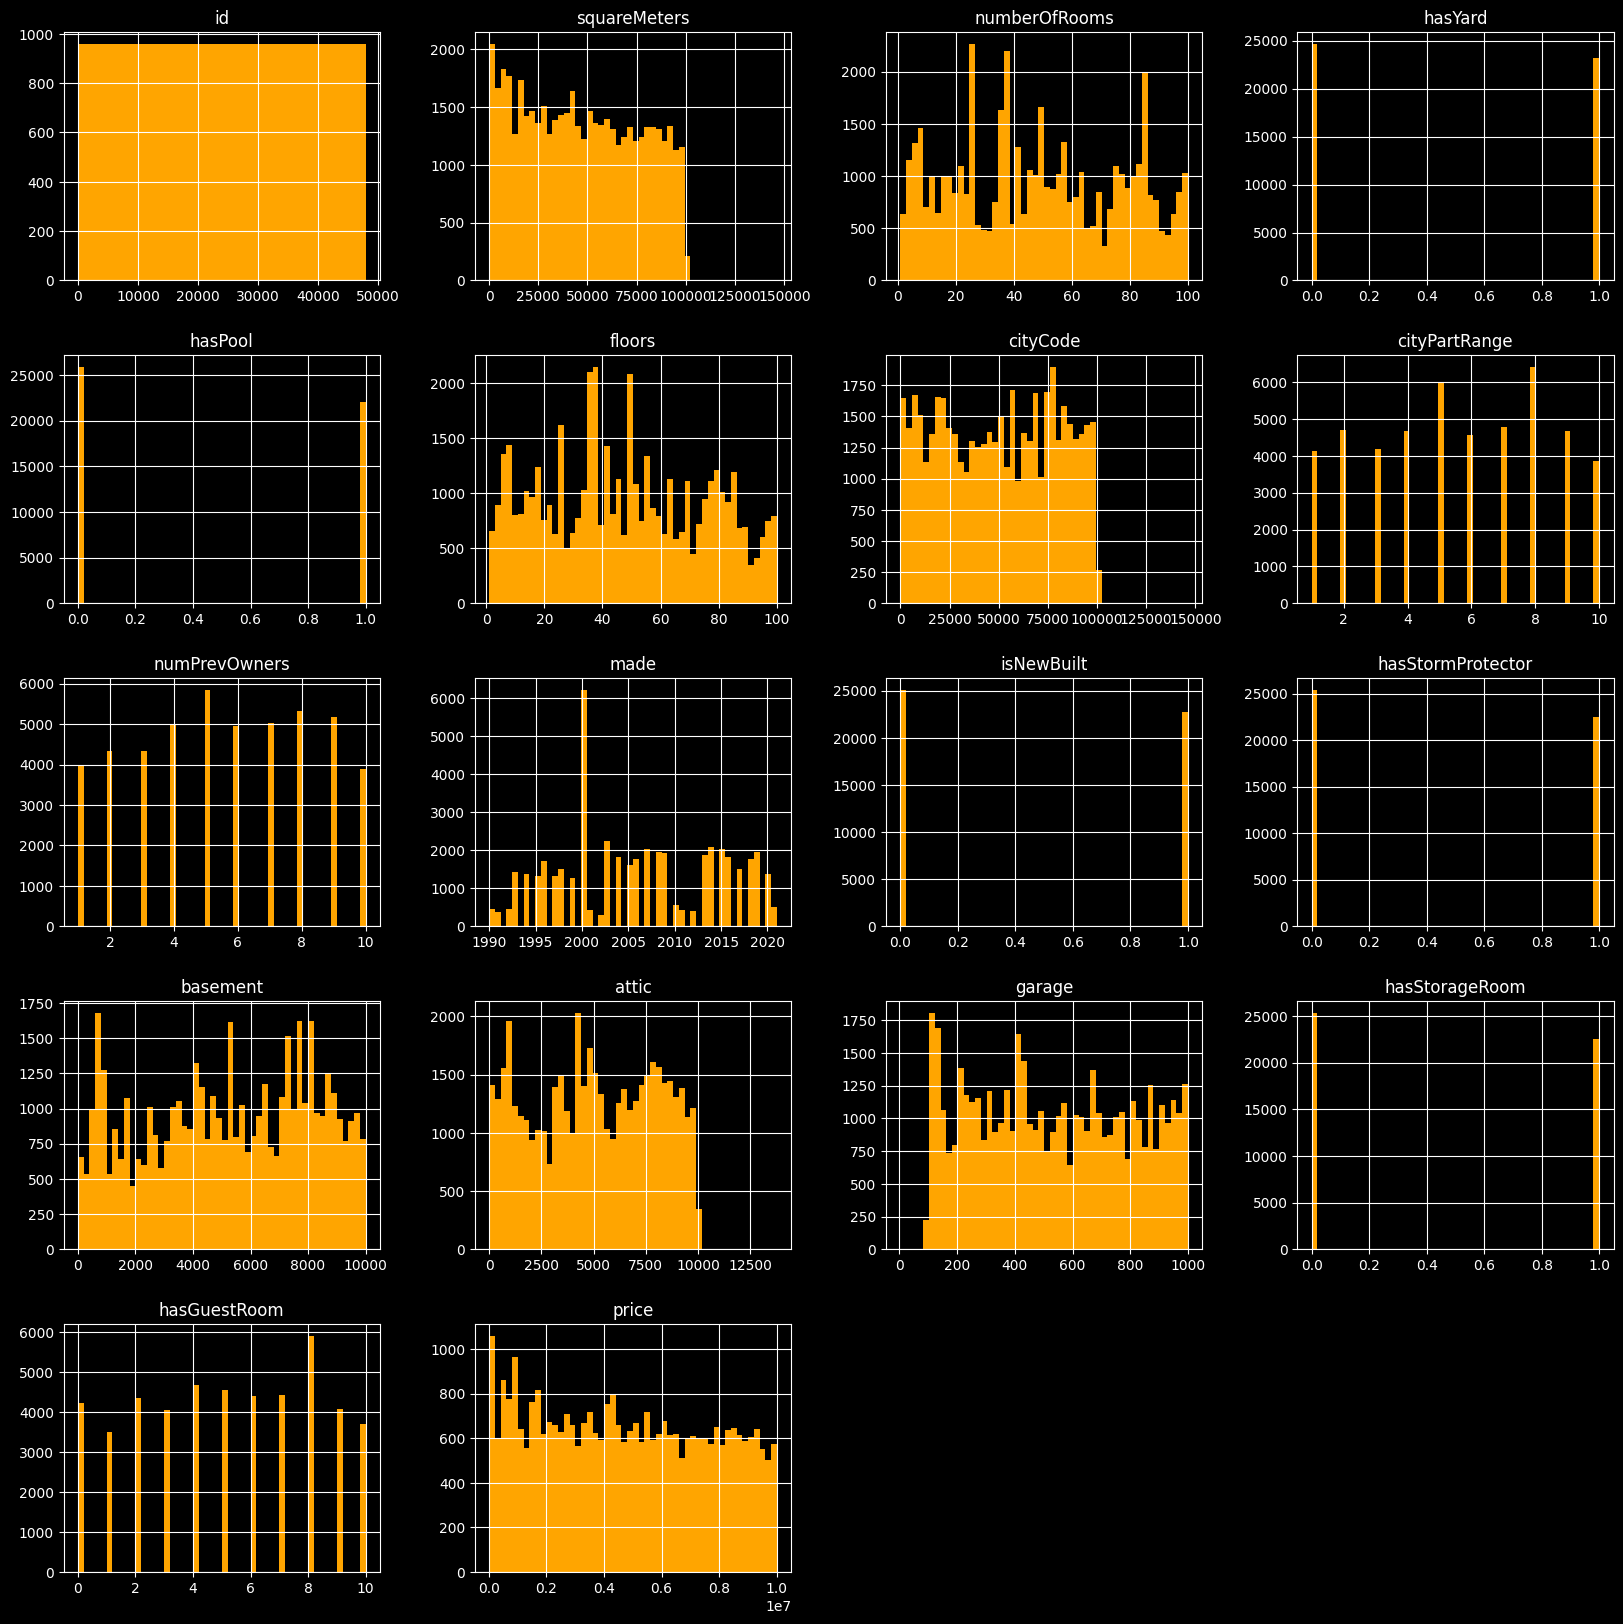

In [17]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
train_test.hist(bins = 50, figsize = (20,20),color="orange")
plt.show()

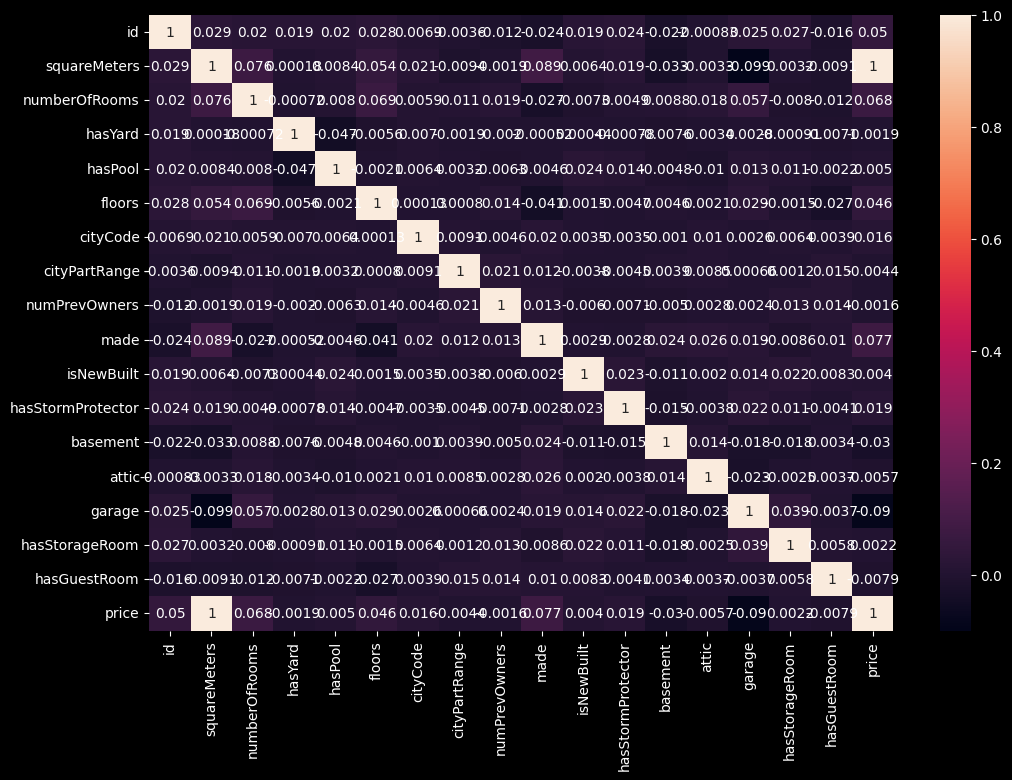

In [18]:
import seaborn as sns
corr = train_test.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
train_test.drop("cityCode",axis=1,inplace=True)
train = train_test[train_test['price'].notnull()]
test = train_test[train_test['price'].isnull()].drop("price",axis=1)

In [20]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('id')
num_cols.remove('price')

In [21]:
made=train.pivot_table(index="made",values="price",aggfunc=["mean","count"])
made.columns=["mean","count"]

In [22]:
made=made.reset_index()

In [23]:
made

made          mean  count
0   1990.000000  5.152068e+06    394
1   1991.000000  4.630189e+06    354
2   1992.000000  5.263261e+06    415
3   1993.000000  4.610424e+06    971
4   1994.000000  4.127820e+06    940
5   1995.000000  4.344807e+06    916
6   1996.000000  4.240107e+06   1149
7   1997.000000  4.371495e+06    888
8   1998.000000  4.023613e+06   1037
9   1999.000000  4.399809e+06    881
10  2000.000000  3.903843e+06   3883
11  2001.000000  5.069494e+06    391
12  2002.000000  5.100700e+06    291
13  2003.000000  4.912077e+06   1488
14  2004.000000  5.353678e+06   1222
15  2005.000000  4.957691e+06   1060
16  2006.000000  5.300009e+06   1217
17  2006.916319  7.767844e+06      5
18  2007.000000  5.482941e+06   1323
19  2008.000000  5.004950e+06   1283
20  2009.000000  5.070266e+06   1296
21  2010.000000  5.036973e+06    443
22  2011.000000  5.233344e+06    389
23  2012.000000  4.940230e+06    356
24  2013.000000  4.809688e+06   1286
25  2014.000000  5.008174e+06   1382
26  2015.000000  5.249819e+06   1341
27  2016.000000  4.674016e+06   1217
28  2017.000000  4.994836e+06   1029
29  2018.000000  4.835693e+06   1261
30  2019.000000  4.612105e+06   1277
31  2020.000000  5.005118e+06    931
32  2021.000000  5.238362e+06    414

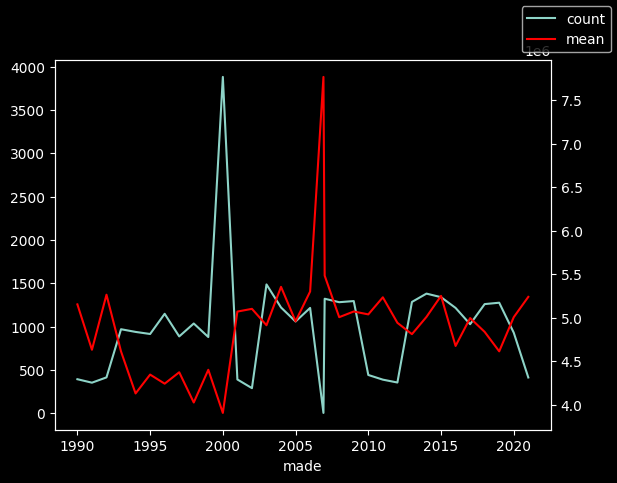

In [24]:
ax = made.plot(x="made", y="count", legend=False)
ax2 = ax.twinx()
made.plot(x="made", y="mean", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

In [27]:
train_1 = train[train['made']<=2000]
test_1 = test[test['made']<=2000]
train_2 = train[(train['made']>=2001)]
test_2 = test[(test['made']>=2001)]

In [28]:
train.price.max() / train.price.min()

970.2594851408347

In [29]:
np.log(train.price.max())

16.118772541816003

In [30]:
train.attic.sort_values(ascending=False)

9115     10000.0
5991     10000.0
5907     10000.0
2014     10000.0
9864     10000.0
          ...   
1028         4.0
15667        1.0
4428         1.0
12810        1.0
7549         1.0
Name: attic, Length: 32730, dtype: float64

In [31]:
np.sqrt(train.attic).sort_values(ascending=False)

9115     100.0
5991     100.0
5907     100.0
2014     100.0
9864     100.0
         ...  
1028       2.0
15667      1.0
4428       1.0
12810      1.0
7549       1.0
Name: attic, Length: 32730, dtype: float64

In [32]:
px.box(train,x="attic",template="plotly_dark")

In [33]:
# train_test[["squareMeters","attic","basement"]]=np.sqrt(train_test[["squareMeters","attic","basement"]])

In [34]:
pd.merge(train_1,made[['made','count']], on = 'made', how = 'inner')

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  \
0          0       34291.0             24        1        0    47.0   
1          1       95145.0             60        0        1    60.0   
2          3       97184.0             99        0        0    59.0   
3         15       31786.0             81        0        1    89.0   
4         20       29271.0             46        0        0    12.0   
...      ...           ...            ...      ...      ...     ...   
11823  47718       76699.0             51        1        0    89.0   
11824  47768       74139.0             11        1        0    18.0   
11825  47785       12179.0             32        0        1    65.0   
11826  47865       41330.0             55        0        1    37.0   
11827  47870       45452.0             11        0        0    15.0   

       cityPartRange  numPrevOwners    made  isNewBuilt  hasStormProtector  \
0                  2              1  2000.0           0                  1   
1                  1              4  2000.0           0                  1   
2                  1              1  2000.0           0                  1   
3                 10              5  2000.0           0                  0   
4                  8              1  2000.0           1                  1   
...              ...            ...     ...         ...                ...   
11823              6              1  1992.0           1                  0   
11824              9              3  1992.0           0                  0   
11825              3              9  1992.0           1                  1   
11826              5              2  1992.0           0                  1   
11827              9              3  1992.0           1                  1   

       basement   attic  garage  hasStorageRoom  hasGuestRoom      price  \
0           8.0  5196.0   369.0               0             3  3436795.2   
1         729.0  4496.0   277.0               0             6  9519958.0   
2        6424.0  8522.0   256.0               1             9  9725732.2   
3        4910.0  7143.0   435.0               1             4  3184469.0   
4        4343.0  3735.0   414.0               0             3  2938810.1   
...         ...     ...     ...             ...           ...        ...   
11823    1791.0  9620.0   229.0               0             2  7678118.2   
11824    1076.0  1403.0   257.0               1             9  7417297.2   
11825    4646.0  5840.0   796.0               0             6  1224992.2   
11826    6976.0  1090.0   828.0               0             7  4139270.2   
11827    2811.0  9474.0   929.0               0             5  4546984.2   

       count  
0       3883  
1       3883  
2       3883  
3       3883  
4       3883  
...      ...  
11823    415  
11824    415  
11825    415  
11826    415  
11827    415  

[11828 rows x 18 columns]

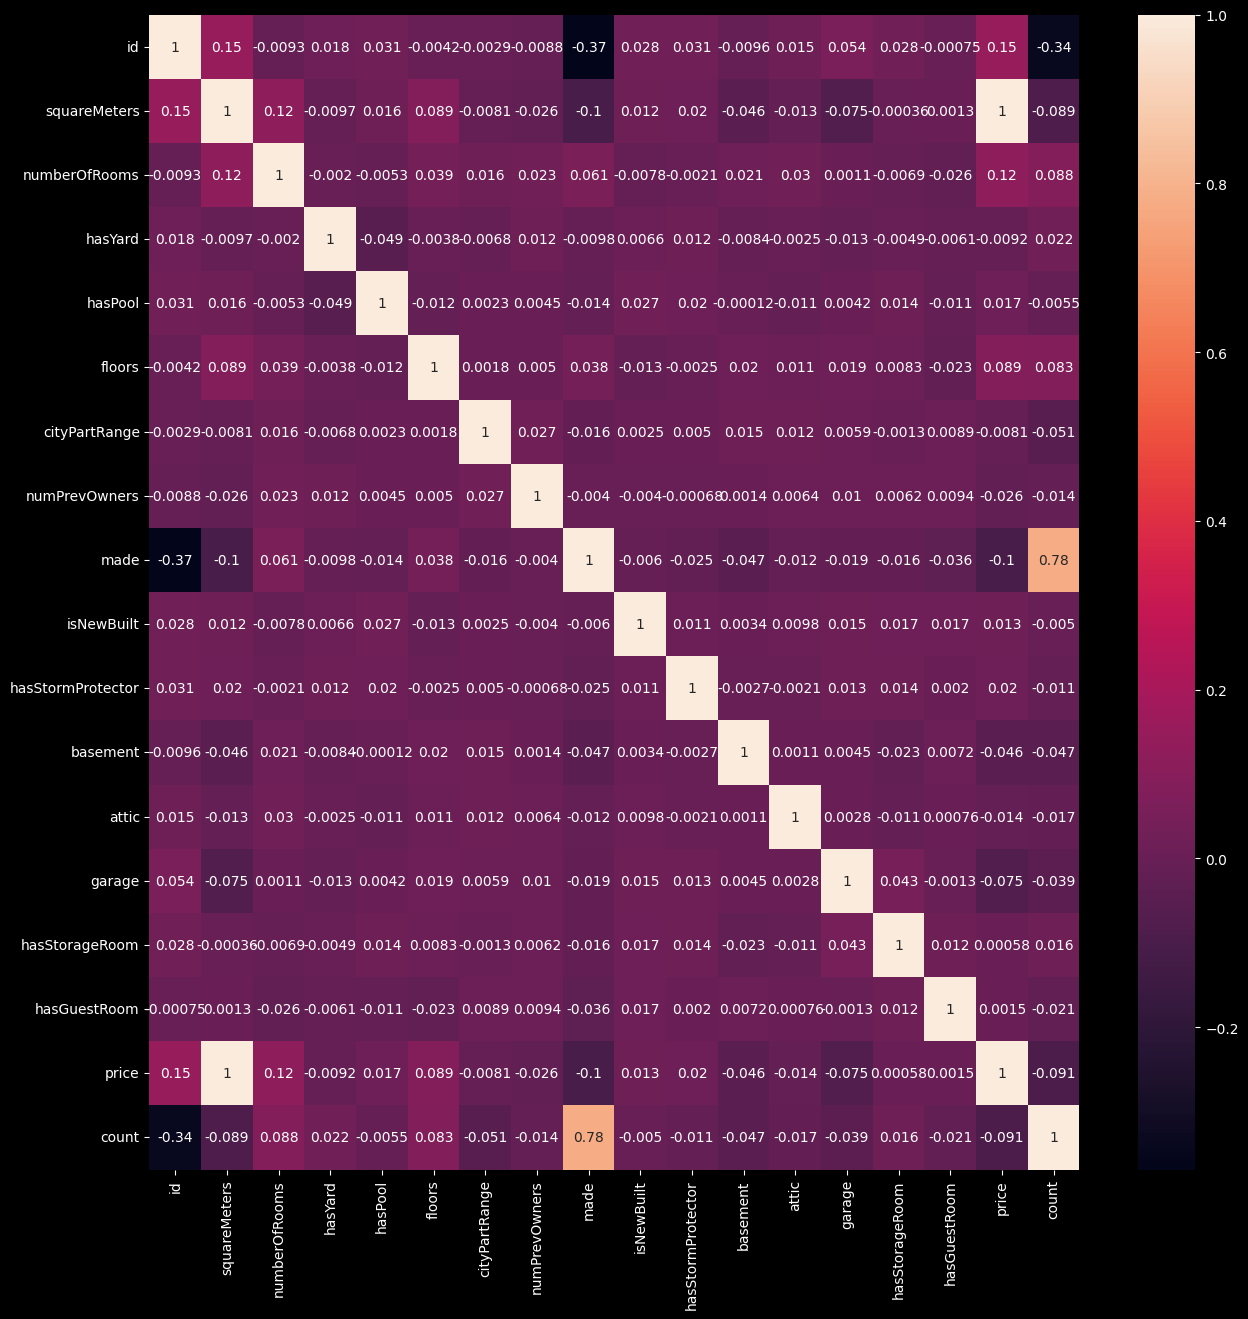

In [35]:
train_1 = pd.merge(train_1,made[['made','count']], on = 'made', how = 'inner')
test_1 = pd.merge(test_1,made[['made','count']], on = 'made', how = 'inner')
plt.figure(figsize=(15,15))
sns.heatmap(train_1.corr(),annot=True)
plt.show()

In [36]:
train_2 = pd.merge(train_2,made[['made','count']], on = 'made', how = 'inner')
test_2 = pd.merge(test_2,made[['made','count']], on = 'made', how = 'inner')

In [37]:
num_cols = num_cols + ['count']

In [38]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def neg_rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

from sklearn.metrics import make_scorer

make_scorer = (make_scorer(neg_rmse))

def get_score(model,X,y):
    n = cross_val_score(model,X,y,scoring =make_scorer,cv=20)
    return n.mean()

In [ ]:
from xgboost import XGBRegressor

X1 = train_1[num_cols]
y1 = train_1['price']


import optuna
def objective(trial):
    
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.6),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'booster': trial.suggest_categorical('booster',["gbtree"])
    }
    
    xgb = XGBRegressor(**param)

    score = cross_val_score(xgb, X1, y1, n_jobs=-1, cv=20,scoring=make_scorer)
    rmse = score.mean()
    return rmse

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='minimize')
study.optimize(objective, n_trials=10) # actually 100 trials

In [40]:
trial = study.best_trial
print(trial.value) # With 100 tries, the score is much lower
print(trial.params)
xgbc1 = XGBRegressor(**trial.params)

122681.89974655281
{'max_depth': 2, 'learning_rate': 0.25356288387155607, 'n_estimators': 590, 'min_child_weight': 10, 'gamma': 0.13157217136893232, 'subsample': 0.9109424423128916, 'colsample_bytree': 0.41886401327710177, 'reg_alpha': 0.10114704961843879, 'reg_lambda': 0.23857590684095975, 'random_state': 91, 'booster': 'gbtree'}


In [41]:
X1 = train_1[num_cols]
# X1 = train_1[['squareMeters']]
y1 = train_1['price']


xgb1=xgbc1.fit(X1,y1)


X_test = test_1[num_cols]
# X_test = test_1[['squareMeters']]
prediction=xgb1.predict(X_test)

test_1['price'] = prediction
test_1

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  \
0     22730       47580.0             89        0        1     8.0   
1     22751       69856.0             47        0        1    26.0   
2     22755       23608.0             51        0        0    31.0   
3     22775       67724.0             11        1        1    64.0   
4     22815       50778.0             39        0        1    94.0   
...     ...           ...            ...      ...      ...     ...   
5584  35303       84696.0             45        0        0    14.0   
5585  35522       42630.0             34        0        1    25.0   
5586  35686       18316.0             20        0        1     5.0   
5587  36267       41700.0             48        0        1     8.0   
5588  36808       42630.0             34        1        0    66.0   

      cityPartRange  numPrevOwners    made  isNewBuilt  hasStormProtector  \
0                 5              3  1995.0           0                  0   
1                 1              8  1995.0           1                  0   
2                10              6  1995.0           1                  0   
3                 2             10  1995.0           0                  1   
4                 2              1  1995.0           0                  0   
...             ...            ...     ...         ...                ...   
5584              7              4  1991.0           0                  1   
5585              9              7  1991.0           1                  0   
5586              2              6  1991.0           0                  0   
5587              5              7  1991.0           0                  0   
5588              2              4  1991.0           0                  1   

      basement   attic  garage  hasStorageRoom  hasGuestRoom  count  \
0       6885.0  8181.0   241.0               0             8    916   
1         17.0   853.0   854.0               1             8    916   
2       6410.0  8153.0   945.0               1             8    916   
3       7448.0  1932.0   128.0               1             2    916   
4       5294.0  7178.0   614.0               0             2    916   
...        ...     ...     ...             ...           ...    ...   
5584    8681.0  5246.0   524.0               1             6    354   
5585    7976.0   331.0   236.0               0             0    354   
5586    6574.0  2166.0   127.0               1             5    354   
5587     743.0  7716.0   194.0               1             2    354   
5588    7466.0   331.0   377.0               0             3    354   

            price  
0     4678425.000  
1     7039427.000  
2     2377709.250  
3     6759221.000  
4     5039415.000  
...           ...  
5584  8475869.000  
5585  4336567.500  
5586  1826684.375  
5587  4309282.500  
5588  4330195.000  

[5589 rows x 18 columns]

In [ ]:
X2 = train_2[num_cols]
# X2 = train_2[['squareMeters']]
y2 = train_2['price']
import optuna
def objective(trial):
    
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.6),
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000),
        'booster': trial.suggest_categorical('booster',["gbtree"])
    }
    
    xgb = XGBRegressor(**param)

    score = cross_val_score(xgb, X2, y2, n_jobs=-1, cv=20,scoring=make_scorer)
    rmse = score.mean()
    return rmse

study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='minimize')
study.optimize(objective, n_trials=10) # actually 100 trials

In [43]:
trial = study.best_trial
print(trial.value)
print(trial.params)
xgbc2 = XGBRegressor(**trial.params)

159700.845888775
{'max_depth': 2, 'learning_rate': 0.5183456146772332, 'n_estimators': 862, 'min_child_weight': 10, 'gamma': 0.3240430935774427, 'subsample': 0.7896539356617435, 'colsample_bytree': 0.39827754803921656, 'reg_alpha': 0.6998171582573126, 'reg_lambda': 0.21154012433075606, 'random_state': 38, 'booster': 'gbtree'}


In [44]:
XGB2=xgbc2.fit(X2,y2)

X_test = test_2[num_cols]
prediction=XGB2.predict(X_test)

test_2['price'] = prediction
test_2

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  \
0     22733       16354.0             47        1        1     9.0   
1     22748       35423.0             52        1        1    24.0   
2     22820       85256.0             74        0        1    39.0   
3     22826       68847.0             74        1        1    80.0   
4     22840       15815.0             13        1        1     7.0   
...     ...           ...            ...      ...      ...     ...   
9560  36015       73748.0             84        0        0    32.0   
9561  36030       90170.0             63        1        1    20.0   
9562  36156       41700.0              8        0        0    64.0   
9563  36298       55620.0             61        1        1    90.0   
9564  30642       67735.0             63        0        1     9.0   

      cityPartRange  numPrevOwners    made  isNewBuilt  hasStormProtector  \
0                 6              5  2019.0           1                  1   
1                 6              8  2019.0           1                  0   
2                 1              1  2019.0           0                  1   
3                10              6  2019.0           0                  1   
4                 7              3  2019.0           1                  1   
...             ...            ...     ...         ...                ...   
9560              5              2  2001.0           1                  1   
9561              9              5  2001.0           1                  0   
9562              7              9  2001.0           1                  0   
9563              3              4  2001.0           1                  1   
9564              4              7  2002.0           0                  1   

      basement   attic  garage  hasStorageRoom  hasGuestRoom  count  \
0        705.0  5097.0   122.0               1             5   1277   
1       8486.0  4375.0   489.0               1             5   1277   
2       3945.0  5240.0   745.0               1             0   1277   
3       9789.0  9476.0   847.0               1             5   1277   
4       2494.0  8575.0   827.0               1             5   1277   
...        ...     ...     ...             ...           ...    ...   
9560    4309.0  7379.0   273.0               1             9    391   
9561    4196.0  2528.0   945.0               1             3    391   
9562    8163.0  8153.0   194.0               0             8    391   
9563    9867.0  7179.0   548.0               0             1    391   
9564     823.0  8144.0   735.0               1             7    291   

            price  
0     1624079.625  
1     3578753.750  
2     8560057.000  
3     6912185.000  
4     1521414.875  
...           ...  
9560  7373036.000  
9561  9047868.000  
9562  4085132.500  
9563  5442535.500  
9564  6824980.000  

[9565 rows x 18 columns]

In [45]:
submission = pd.concat([test_1,test_2])
submission = submission[['id','price']]
submission = submission.sort_values(by = ['id'])
submission.to_csv('sub.csv',index = False)
submission.head() # with more trials the score is much better

id        price
0    22730  4678425.000
402  22731  6220679.000
827  22732  9060591.000
0    22733  1624079.625
685  22734  6704793.000